## Growth vs. Date of Join
-   Are more recently (within the last 5 years) joined Unicorns experiencing higher or lower growth rates compared to those that joined earlier
-   Do Unicorn companies that joined during specific periods (e.g., economic booms or recessions) show different growth patterns?-   Are there any time factors (e.g., economic conditions, technological advancements of the date joined) that correlate with the trends observed in Unicorn qualifications?


In [1]:
# Import Dependenciews
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
import pandas as pd
from pathlib import Path
import datetime as dt

In [2]:
# Load and read CSV file
csvPath = Path("Project-1-CSVs/merged_df.csv")
mergedDF = pd.read_csv(csvPath, encoding="UTF-8")

# Drop original CSV indexing
mergedDF = mergedDF.drop(columns=['Unnamed: 0'])

# Display
mergedDF.head(10)

,Company,2022_Valuation,2023_Valuation,2024_Valuation,Date Joined,Country,City,Industry,Select Investors
0,ByteDance,$140,$225,225.0,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$127,$137,150.0,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100,$66,66.0,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95,$50,65.0,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,$40,$40,25.4,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."
5,Checkout.com,$40,$11,11.0,5/2/2019,United Kingdom,London,Fintech,"Tiger Global Management, Insight Partners, DST..."
6,Instacart,$39,$12,NaN,12/30/2014,United States,San Francisco,"Supply chain, logistics, & delivery","Khosla Ventures, Kleiner Perkins Caufield & By..."
7,Databricks,$38,$31,43.0,2/5/2019,United States,San Francisco,Data management & analytics,"Andreessen Horowitz, New Enterprise Associates..."
8,Revolut,$33,$33,33.0,4/26/2018,United Kingdom,London,Fintech,"index Ventures, DST Global, Ribbit Capital"
9,Epic Games,$31.50,$31.50,22.5,10/26/2018,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures"


In [3]:
# Reformat date Joined
mergedDF['Date Joined'] = pd.to_datetime(mergedDF['Date Joined'], format = '%m/%d/%Y')

# Create a sorted DataFrame
sortedMergedDF = pd.DataFrame(mergedDF)

# Sort companies from earliest join date to most recent join date
sortedMergedDF = sortedMergedDF.sort_values(by="Date Joined", ascending = True)

# Display top 10 (earliest joined)
sortedMergedDF.head(10)


,Company,2022_Valuation,2023_Valuation,2024_Valuation,Date Joined,Country,City,Industry,Select Investors
725,Veepee,$1.38,$1.38,1.38,2007-07-02,France,La Plaine Saint-Denis,E-commerce & direct-to-consumer,"Summit Partners, Qatar Holding"
125,Vice Media,$5.70,NaN,NaN,2011-04-02,United States,Brooklyn,Internet software & services,"Technology Crossover Ventures, A&E Television ..."
105,Klarna,$6.70,$6.70,6.70,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
447,Trendy Group International,$2,$2,2.00,2012-02-13,Hong Kong,Kowloon,Consumer & retail,L Capital Partners
11,Fanatics,$27,$31,31.00,2012-06-06,United States,Jacksonville,E-commerce & direct-to-consumer,"SoftBank Group, Andreessen Horowitz, Temasek H..."
1,SpaceX,$127,$137,150.00,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
448,Avant,$2,$2,2.00,2012-12-17,United States,Chicago,Artificial intelligence,"RRE Ventures, Tiger Global, August Capital"
615,Mu Sigma,$1.50,$1.50,1.50,2013-02-07,United States,Northbrook,Data management & analytics,"Sequoia Capital, General Atlantic"
93,Automattic,$7.50,$7.50,7.50,2013-05-27,United States,San Francisco,Internet software & services,"Insight Venture Partners, Lowercase Capital, P..."
930,Lookout,$1,$1,1.00,2013-10-10,United States,San Francisco,Cybersecurity,"Accel Partners, Greylock Partners, Lowercase C..."


In [4]:
# Display the bottom 10 (most recently joined)
sortedMergedDF.tail(10)

,Company,2022_Valuation,2023_Valuation,2024_Valuation,Date Joined,Country,City,Industry,Select Investors
787,ClassDojo,$1.25,$1.25,1.25,2022-07-21,United States,San Francisco,Edtech,"General Catalyst, Unkork Capital, Tencent Hold..."
1206,Unstoppable Domains,$1,$1,1.00,2022-07-27,United States,Las Vegas,Internet software & services,"Boost VC, Draper Associates, Gaingels"
183,Zhiji Auto,$4.50,NaN,NaN,2022-08-01,China,Shanghai,Auto & transportation,"Pudong VC, Zhiyou Venture Capital"
857,DANA,$1.13,$1.13,1.13,2022-08-10,Indonesia,Jakarta,Fintech,"Ant Group, Lazada, Sinar Mas Indonesia"
926,Flow,$1,$1,1.00,2022-08-15,United States,New York,Fintech,Andreessen Horowitz
617,Orna Therapeutics,$1.50,$1.50,1.50,2022-08-16,United States,Cambridge,Health,"MPM Capital, Astellas Venture Management, F2 V..."
537,MEGAZONE,$1.83,$1.83,1.83,2022-08-16,South Korea,Seoul,Internet,"Salesforce Ventures, ATP Investment, kt invest..."
744,Shiprocket,$1.30,$1.30,1.23,2022-08-16,India,New Delhi,Internet,"Bertelsmann India Investments, March Capital P..."
573,Incredible Health,$1.65,$1.65,1.65,2022-08-17,United States,San Francisco,Internet software & services,"Obvious Ventures, Andreessen Horowitz, NFX"
350,Tridge,$2.70,$2.70,2.70,2022-08-24,South Korea,Seoul,Internet software & services,"Forest Partners, Softbank Ventures Asia"


In [5]:
# Isolate the year from date
sortedMergedDF['Year Joined'] = sortedMergedDF['Date Joined'].dt.year

# Group by year and count number of companies joined per year
countsPerYear = sortedMergedDF.groupby(sortedMergedDF['Date Joined'].dt.year)['Company'].count()

# Count how many companies are expected in each bar
countsPerYear

Date Joined
2007      1
2011      2
2012      4
2013      3
2014     12
2015     34
2016     21
2017     44
2018    104
2019    102
2020    108
2021    538
2022    234
Name: Company, dtype: int64

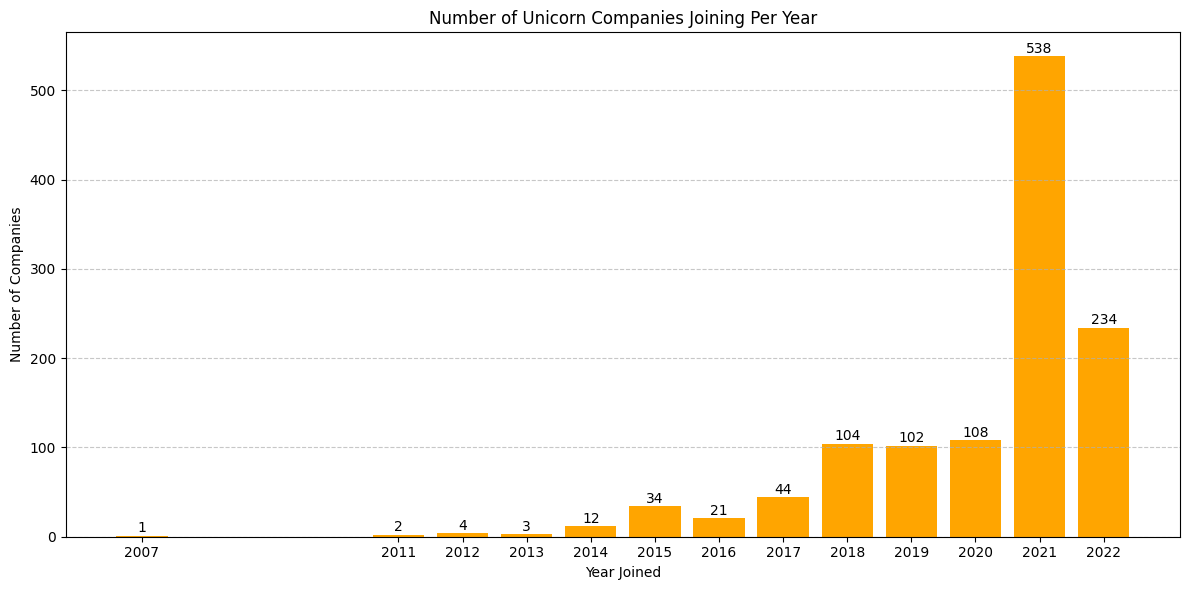

In [6]:
# Create a bar plot to visualize counts per year
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(countsPerYear.index, countsPerYear.values, color='orange')
ax.set_xlabel('Year Joined')
ax.set_ylabel('Number of Companies')
ax.set_title('Number of Unicorn Companies Joining Per Year')
ax.set_xticks(countsPerYear.index)
ax.set_xticklabels(countsPerYear.index)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add text annotations to each bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom')
    
plt.tight_layout()
plt.show()

In [7]:
# Identify missing values in 2023Valuations and 2024Valuations to see what companies fell off from the Unicorn Company qualifications
inactiveUnicorns = sortedMergedDF[(sortedMergedDF['2023_Valuation'].isnull()) | (sortedMergedDF['2024_Valuation'].isnull())]

# Print companies with missing valuations for 2023 or 2024
inactiveUnicorns[['Company', '2022_Valuation','2023_Valuation', '2024_Valuation']]

,Company,2022_Valuation,2023_Valuation,2024_Valuation
125,Vice Media,$5.70,NaN,NaN
228,Intarcia Therapeutics,$3.80,$3.80,NaN
110,Ola Cabs,$7.50,NaN,NaN
6,Instacart,$39,$12,NaN
939,JimuBox,$1,NaN,NaN
...,...,...,...,...
762,CredAvenue,$1.30,NaN,NaN
1188,Instabox,$1,NaN,NaN
1193,Polarium,$1,$1,NaN
931,Perimeter 81,$1,$1,NaN


In [8]:
# Create a DataFrame that only has the currently active Unicorn companies
activeCompaniesDF = sortedMergedDF.dropna(subset=['2023_Valuation', '2024_Valuation'])
activeCompaniesDF = pd.DataFrame(activeCompaniesDF)

# Verify the cleaned DataFrame of the companies still qualify to be Unicorn Companies in 2024
activeCompaniesDF

,Company,2022_Valuation,2023_Valuation,2024_Valuation,Date Joined,Country,City,Industry,Select Investors,Year Joined
725,Veepee,$1.38,$1.38,1.38,2007-07-02,France,La Plaine Saint-Denis,E-commerce & direct-to-consumer,"Summit Partners, Qatar Holding",2007
105,Klarna,$6.70,$6.70,6.70,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2011
447,Trendy Group International,$2,$2,2.00,2012-02-13,Hong Kong,Kowloon,Consumer & retail,L Capital Partners,2012
11,Fanatics,$27,$31,31.00,2012-06-06,United States,Jacksonville,E-commerce & direct-to-consumer,"SoftBank Group, Andreessen Horowitz, Temasek H...",2012
1,SpaceX,$127,$137,150.00,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
...,...,...,...,...,...,...,...,...,...,...
617,Orna Therapeutics,$1.50,$1.50,1.50,2022-08-16,United States,Cambridge,Health,"MPM Capital, Astellas Venture Management, F2 V...",2022
537,MEGAZONE,$1.83,$1.83,1.83,2022-08-16,South Korea,Seoul,Internet,"Salesforce Ventures, ATP Investment, kt invest...",2022
744,Shiprocket,$1.30,$1.30,1.23,2022-08-16,India,New Delhi,Internet,"Bertelsmann India Investments, March Capital P...",2022
573,Incredible Health,$1.65,$1.65,1.65,2022-08-17,United States,San Francisco,Internet software & services,"Obvious Ventures, Andreessen Horowitz, NFX",2022


In [15]:
# Group by year and count number of ACTIVE companies joined per year
countsActivePerYear = activeCompaniesDF.groupby(activeCompaniesDF['Date Joined'].dt.year)['Company'].count()

# Count how many companies are expected in each bar
countsActivePerYear

Date Joined
2007      1
2011      1
2012      4
2013      3
2014      9
2015     30
2016     19
2017     37
2018     92
2019     90
2020     87
2021    478
2022    220
Name: Company, dtype: int64

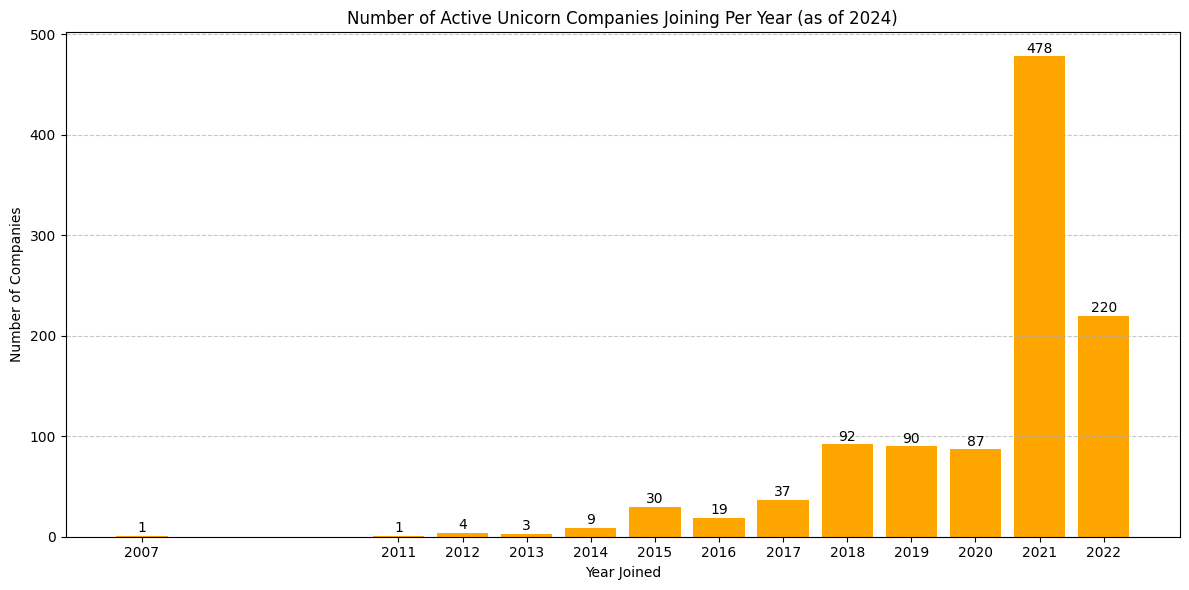

In [16]:
# Create a bar plot to visualize counts per year
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(countsActivePerYear.index, countsActivePerYear.values, color='orange')
ax.set_xlabel('Year Joined')
ax.set_ylabel('Number of Companies')
ax.set_title('Number of Active Unicorn Companies Joining Per Year (as of 2024)')
ax.set_xticks(countsActivePerYear.index)
ax.set_xticklabels(countsActivePerYear.index)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add text annotations to each bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom')
    
plt.tight_layout()
plt.show()

In [11]:
# Check to see if all valuation columns are int or float
valuationCols = ['2022_Valuation', '2023_Valuation', '2024_Valuation']
valuationDtypes = activeCompaniesDF[valuationCols].dtypes

print(valuationDtypes)

2022_Valuation     object
2023_Valuation     object
2024_Valuation    float64
dtype: object


In [12]:
# Remove non-numeric characters and convert object into a float
activeCompaniesDF['2022_Valuation'] = activeCompaniesDF['2022_Valuation'].str.replace('$', '').str.replace(',', '').astype(float)
activeCompaniesDF['2023_Valuation'] = activeCompaniesDF['2023_Valuation'].str.replace('$', '').str.replace(',', '').astype(float)


print(activeCompaniesDF[['2022_Valuation', '2023_Valuation']].dtypes)

2022_Valuation    float64
2023_Valuation    float64
dtype: object


In [46]:
activeCompaniesDF['growthRateIntOne'] = ((activeCompaniesDF['2023_Valuation'] - activeCompaniesDF['2022_Valuation']) / 
                                         activeCompaniesDF['2022_Valuation']) * 100
activeCompaniesDF['growthRateIntTwo'] = ((activeCompaniesDF['2024_Valuation'] - activeCompaniesDF['2023_Valuation']) / 
                                         activeCompaniesDF['2023_Valuation']) * 100

growthRateDF = activeCompaniesDF[['Company', 'growthRateIntOne', 'growthRateIntTwo','Date Joined']]

growthRateDF


,Company,growthRateIntOne,growthRateIntTwo,Date Joined
725,Veepee,0.000000,0.000000,2007-07-02
105,Klarna,0.000000,0.000000,2011-12-12
447,Trendy Group International,0.000000,0.000000,2012-02-13
11,Fanatics,14.814815,0.000000,2012-06-06
1,SpaceX,7.874016,9.489051,2012-12-01
...,...,...,...,...
617,Orna Therapeutics,0.000000,0.000000,2022-08-16
537,MEGAZONE,0.000000,0.000000,2022-08-16
744,Shiprocket,0.000000,-5.384615,2022-08-16
573,Incredible Health,0.000000,0.000000,2022-08-17


In [47]:
# Filter out rows where growth rates are 0
df = growthRateDF[(growthRateDF['growthRateIntOne'] != 0) & (growthRateDF['growthRateIntTwo'] != 0)]

# Extract the year from 'Date Joined'
df['Year_Joined'] = df['Date Joined'].dt.year

# Calculate the average growth rate for each year
df = df.groupby('Year_Joined')[['growthRateIntOne', 'growthRateIntTwo']].mean().reset_index()


print(df)


   Year_Joined  growthRateIntOne  growthRateIntTwo
0         2012          7.874016          9.489051
1         2014        -47.368421         30.000000
2         2018        -21.398810        128.658009
3         2019        298.243211         68.746138
4         2021         33.129429          3.129361
5         2022         84.500467          5.046296


C:\Users\yoian\AppData\Local\Temp\ipykernel_13340\4210273044.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year_Joined'] = df['Date Joined'].dt.year


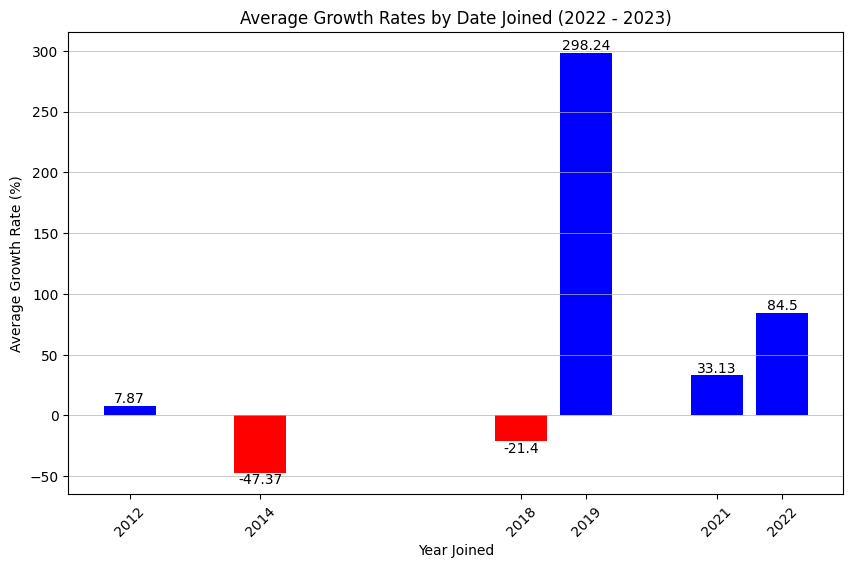

In [36]:
# Create data visualization of th growth rate of interval one (2022 - 2023)

# Prepare data for the bar chart of avg growth rate for each year
plt.figure(figsize=(10, 6))
colors = ['blue' if x >= 0 else 'red' for x in df['growthRateIntOne']]
bars = plt.bar(df['Year_Joined'], df['growthRateIntOne'], color=colors)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom' if yval >= 0 else 'top', fontsize=10)
plt.title('Average Growth Rates by Date Joined (2022 - 2023)')
plt.xlabel('Year Joined')
plt.ylabel('Average Growth Rate (%)')
plt.xticks(df['Year_Joined'],rotation=45)
plt.grid(axis='y', linewidth=0.5)
plt.show()

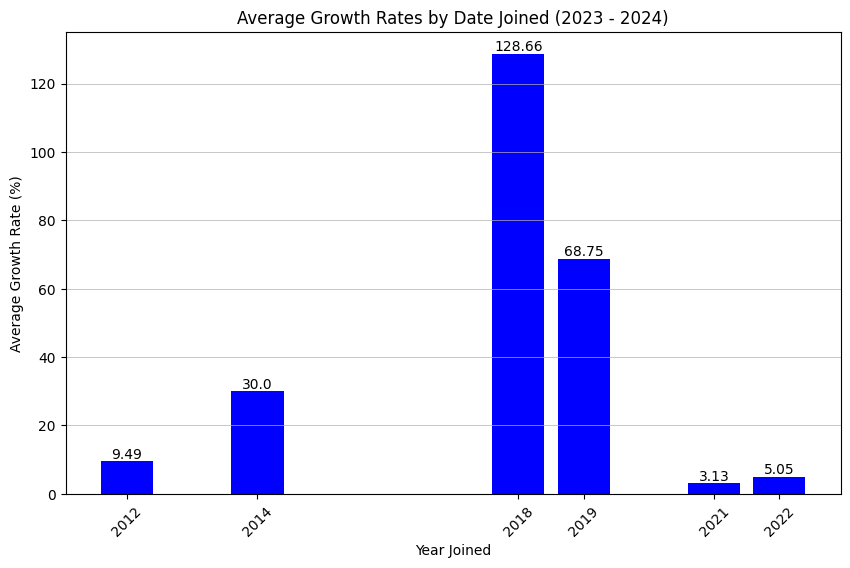

In [77]:
# Create data visualization of th growth rate of interval one (2022 - 2023)

# Prepare data for the bar chart of avg growth rate for each year
plt.figure(figsize=(10, 6))
bars = plt.bar(df['Year_Joined'], df['growthRateIntTwo'], color='blue')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom' if yval >= 0 else 'top', fontsize=10)
plt.title('Average Growth Rates by Date Joined (2023 - 2024)')
plt.xlabel('Year Joined')
plt.ylabel('Average Growth Rate (%)')
plt.xticks(df['Year_Joined'],rotation=45)
plt.grid(axis='y', linewidth=0.5)
plt.show()

In [55]:
intOneMean = df.groupby('Year_Joined')['growthRateIntOne'].mean()
intTwoMean = df.groupby('Year_Joined')['growthRateIntTwo'].mean()
overallGrowthRate = (intOneMean + intTwoMean)/2
overallGrowthRate

Year_Joined
2012      8.681533
2014     -8.684211
2018     53.629600
2019    183.494674
2021     18.129395
2022     44.773382
dtype: float64

In [78]:
meanDF = pd.DataFrame({
    'Year Joined': intOneMean.index,
    'Growth Rate Interval One': intOneMean.values,
    'Growth Rate Interval Two': intTwoMean.values,
    'Overall Growth Rate': overallGrowthRate.values
})
meanDF

,Year Joined,Growth Rate Interval One,Growth Rate Interval Two,Overall Growth Rate
0,2012,7.874016,9.489051,8.681533
1,2014,-47.368421,30.000000,-8.684211
2,2018,-21.398810,128.658009,53.629600
3,2019,298.243211,68.746138,183.494674
4,2021,33.129429,3.129361,18.129395
5,2022,84.500467,5.046296,44.773382


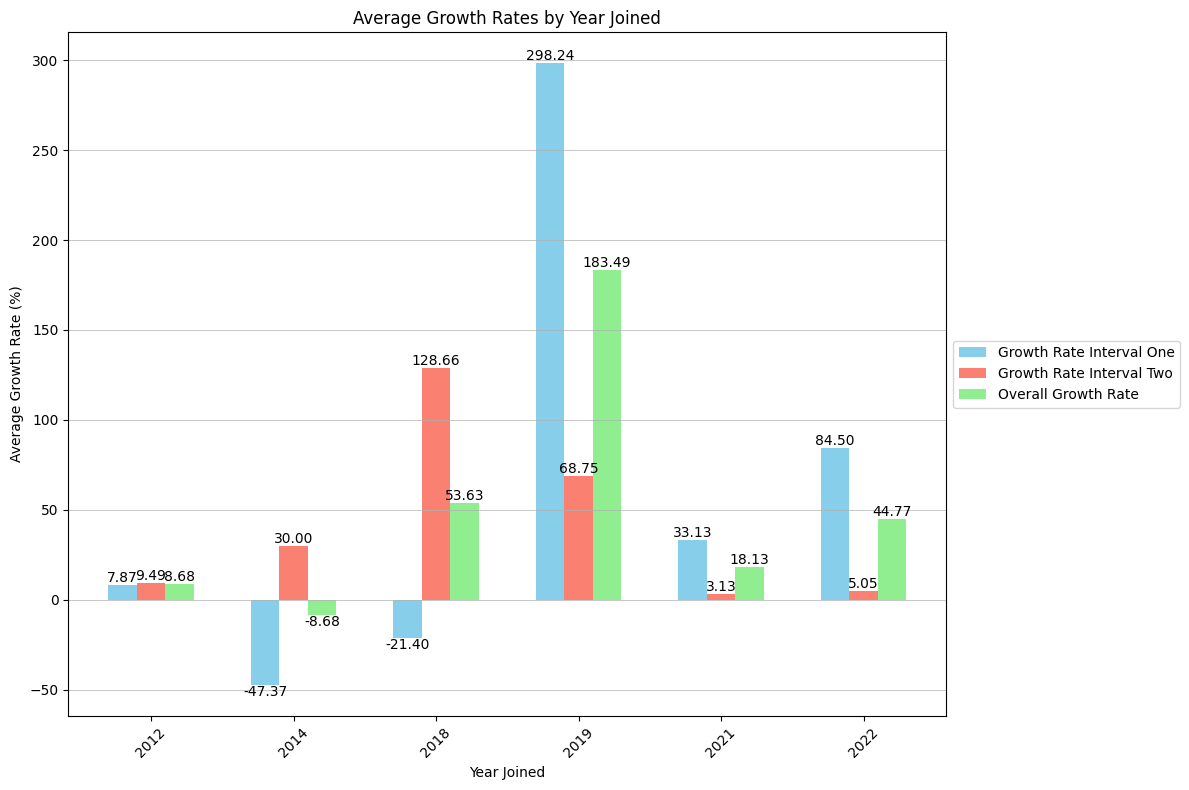

In [79]:
# Plotting the bar graph
plt.figure(figsize=(12, 8))

# Plot each growth rate as a separate bar group
bar_width = 0.2
index = range(len(meanDF))

intOneBar = plt.bar(index, meanDF['Growth Rate Interval One'], bar_width, label='Growth Rate Interval One', color='skyblue')
intTwoBar = plt.bar([i + bar_width for i in index], meanDF['Growth Rate Interval Two'], bar_width, label='Growth Rate Interval Two', color='salmon')
overallBar = plt.bar([i + 2 * bar_width for i in index], meanDF['Overall Growth Rate'], bar_width, label='Overall Growth Rate', color='lightgreen')

for bars in [intOneBar, intTwoBar, overallBar]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom' if height >= 0 else 'top')

# Setting labels and title
plt.xlabel('Year Joined')
plt.ylabel('Average Growth Rate (%)')
plt.title('Average Growth Rates by Year Joined')
plt.xticks([i + bar_width for i in index], meanDF['Year Joined'], rotation=45)
plt.grid(axis='y', linewidth=0.5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()